In [1]:
import numpy as np
import pandas as pd
import sklearn as sk
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder 
from sklearn import preprocessing
from sklearn.model_selection import train_test_split


url ="avila-tr.txt"
url1 ="avila-ts.txt"
data1 = pd.read_csv(url,header=None, sep=',') 
data2 = pd.read_csv(url1,header=None, sep=',')
data = pd.concat([data1,data2])

data.columns = ['F1 intercolumnar distance','F2 upper margin','F3 lower margin','F4 exploitation','F5 row number','F6 modular ratio','F7 interlinear spacing','F8 weight','F9 peak number','F10 modular ratio/ interlinear spacing','type copyist']
data

ParserError: Error tokenizing data. C error: Expected 5 fields in line 2, saw 11


In [1]:
#número de registros y atributos
shape = data2.shape
shape

NameError: name 'data2' is not defined

In [ ]:
shape = data1.shape
shape

In [3]:
#tipo de datos
data. dtypes

F1 intercolumnar distance                 float64
F2 upper margin                           float64
F3 lower margin                           float64
F4 exploitation                           float64
F5 row number                             float64
F6 modular ratio                          float64
F7 interlinear spacing                    float64
F8 weight                                 float64
F9 peak number                            float64
F10 modular ratio/ interlinear spacing    float64
type copyist                               object
dtype: object

In [4]:
#Medidas de centralidad y desviación para atributos numéricos:
data.describe()

,F1 intercolumnar distance,F2 upper margin,F3 lower margin,F4 exploitation,F5 row number,F6 modular ratio,F7 interlinear spacing,F8 weight,F9 peak number,F10 modular ratio/ interlinear spacing
count,2.086700e+04,20867.000000,20867.000000,20867.000000,2.086700e+04,20867.000000,20867.000000,20867.000000,20867.000000,20867.000000
mean,-3.306656e-09,0.018498,0.002329,0.000115,5.697992e-08,0.002540,0.003977,0.000028,0.002108,0.000069
std,1.000007e+00,2.853117,1.058203,0.999997,9.999948e-01,1.065179,1.153325,1.000003,1.045362,1.000010
min,-3.498799e+00,-2.426761,-3.210528,-5.440122,-4.922215e+00,-7.450257,-11.935457,-4.247781,-5.486218,-6.719324
25%,-1.289290e-01,-0.259834,0.064919,-0.527256,1.723400e-01,-0.598658,-0.044076,-0.543914,-0.372457,-0.515235
50%,5.622900e-02,-0.055704,0.217845,0.089437,2.617180e-01,-0.058835,0.220177,0.108279,0.064084,-0.025918
75%,2.043550e-01,0.203385,0.352988,0.643738,2.617180e-01,0.564038,0.446679,0.648813,0.500624,0.528425
max,1.181992e+01,386.000000,50.000000,3.987152,1.066121e+00,53.000000,83.000000,13.173081,44.000000,11.911338


In [5]:
#Medidas de centralidad para atributos categóricos:
data.mode()

,F1 intercolumnar distance,F2 upper margin,F3 lower margin,F4 exploitation,F5 row number,F6 modular ratio,F7 interlinear spacing,F8 weight,F9 peak number,F10 modular ratio/ interlinear spacing,type copyist
0,-3.498799,-0.189174,-3.210528,-5.440122,0.261718,0.107265,0.295677,-0.24778,0.001721,-0.691759,A


In [6]:
#matriz de correlación
data.corr()

,F1 intercolumnar distance,F2 upper margin,F3 lower margin,F4 exploitation,F5 row number,F6 modular ratio,F7 interlinear spacing,F8 weight,F9 peak number,F10 modular ratio/ interlinear spacing
F1 intercolumnar distance,1.000000,-0.046363,0.036442,-0.057191,0.447930,-0.053406,-0.026103,-0.057518,0.081785,-0.013904
F2 upper margin,-0.046363,1.000000,0.300381,0.000425,-0.085892,0.296413,0.459383,0.040535,0.231004,-0.031986
F3 lower margin,0.036442,0.300381,1.000000,0.144168,0.011871,0.034247,0.185502,0.032930,0.120078,-0.057389
F4 exploitation,-0.057191,0.000425,0.144168,1.000000,0.096447,0.266778,0.043836,0.358603,0.294643,0.327626
F5 row number,0.447930,-0.085892,0.011871,0.096447,1.000000,0.041697,0.019832,-0.065375,0.286023,0.144194
F6 modular ratio,-0.053406,0.296413,0.034247,0.266778,0.041697,1.000000,0.395452,-0.043804,0.148651,0.806490
F7 interlinear spacing,-0.026103,0.459383,0.185502,0.043836,0.019832,0.395452,1.000000,0.015823,0.176611,0.274931
F8 weight,-0.057518,0.040535,0.032930,0.358603,-0.065375,-0.043804,0.015823,1.000000,0.519697,0.001312
F9 peak number,0.081785,0.231004,0.120078,0.294643,0.286023,0.148651,0.176611,0.519697,1.000000,0.192805
F10 modular ratio/ interlinear spacing,-0.013904,-0.031986,-0.057389,0.327626,0.144194,0.806490,0.274931,0.001312,0.192805,1.000000


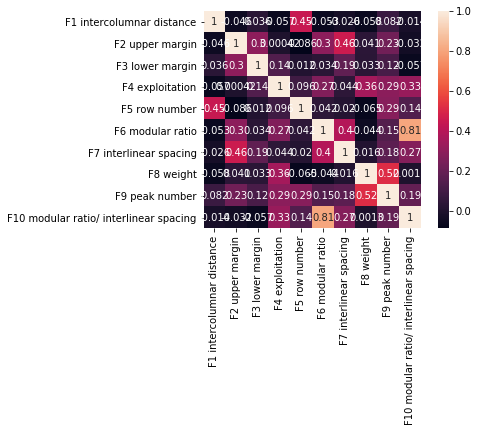

In [7]:
sns.heatmap(data.corr(), square=True, annot=True)

In [8]:
#Verificar la matriz de correlación 

def correlation(dataset, threshold):
    col_corr = set() # Set of all the names of deleted columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j] >= threshold) and (corr_matrix.columns[j] not in col_corr):
                print('Las columnas que presentan una alta correlación son:', corr_matrix.columns[i], corr_matrix.columns[j])
    return dataset

data = correlation(data,0.90)

In [9]:
# Cual es el máximo de datos faltantes en un mismo registro?
max(data.isnull().sum(axis=1))

0

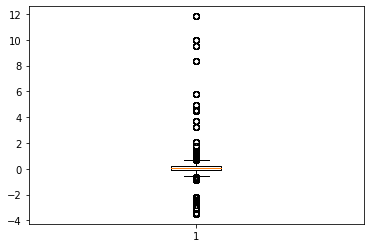

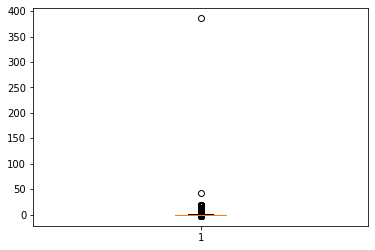

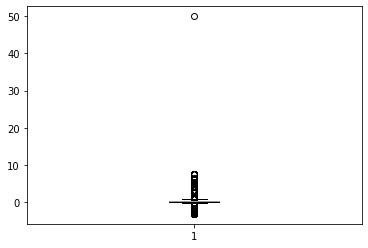

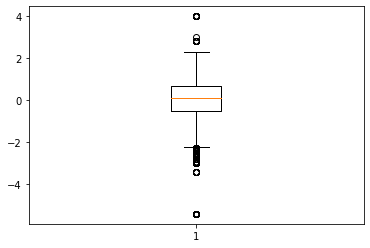

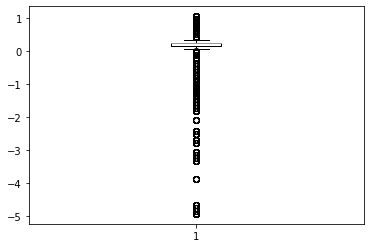

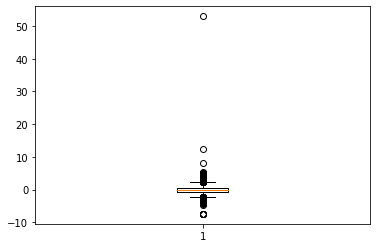

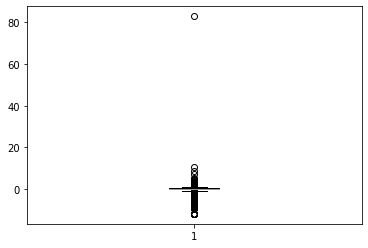

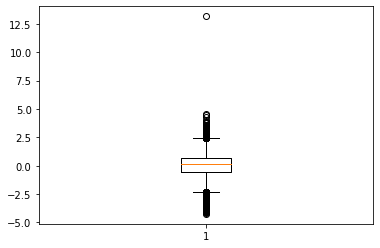

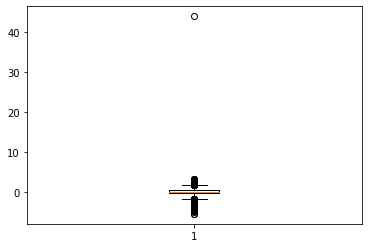

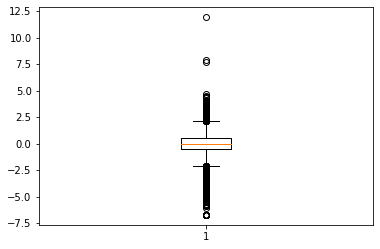

In [10]:
#En qué atributos hay datos atípicos?
plt.boxplot(data['F1 intercolumnar distance'])
plt.show()
plt.boxplot(data['F2 upper margin'])
plt.show()
plt.boxplot(data['F3 lower margin'])
plt.show()
plt.boxplot(data['F4 exploitation'])
plt.show()
plt.boxplot(data['F5 row number'])
plt.show()
plt.boxplot(data['F6 modular ratio'])
plt.show()
plt.boxplot(data['F7 interlinear spacing'])
plt.show()
plt.boxplot(data['F8 weight'])
plt.show()
plt.boxplot(data['F9 peak number'])
plt.show()
plt.boxplot(data['F10 modular ratio/ interlinear spacing'])
plt.show()


A    8572
F    3923
E    2190
I    1663
X    1044
H    1039
G     893
D     705
Y     533
C     206
W      89
B      10
Name: type copyist, dtype: int64


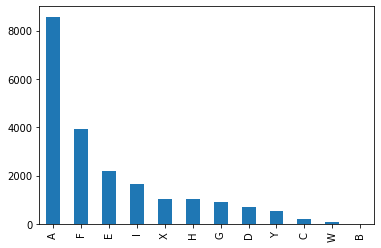

In [11]:
#Cuantos registros hay por cada clase? es decir, por cada valor del atributo de salida?
clasificar = data['type copyist'].value_counts()
print(clasificar)
clasificar.plot(kind='bar');

In [12]:
#Transformar el atributo categórico(type copyist) a atributo númerico.

labelencoder= LabelEncoder() #initializing an object of class LabelEncoder
data['type copyist'] = labelencoder.fit_transform(data['type copyist'])
data. dtypes


F1 intercolumnar distance                 float64
F2 upper margin                           float64
F3 lower margin                           float64
F4 exploitation                           float64
F5 row number                             float64
F6 modular ratio                          float64
F7 interlinear spacing                    float64
F8 weight                                 float64
F9 peak number                            float64
F10 modular ratio/ interlinear spacing    float64
type copyist                                int64
dtype: object

In [13]:
#Calcular una vez más la correlación entre los atributos para definir si es necesario eliminar un atributo.
data.corr()

,F1 intercolumnar distance,F2 upper margin,F3 lower margin,F4 exploitation,F5 row number,F6 modular ratio,F7 interlinear spacing,F8 weight,F9 peak number,F10 modular ratio/ interlinear spacing,type copyist
F1 intercolumnar distance,1.000000,-0.046363,0.036442,-0.057191,0.447930,-0.053406,-0.026103,-0.057518,0.081785,-0.013904,0.030998
F2 upper margin,-0.046363,1.000000,0.300381,0.000425,-0.085892,0.296413,0.459383,0.040535,0.231004,-0.031986,-0.023151
F3 lower margin,0.036442,0.300381,1.000000,0.144168,0.011871,0.034247,0.185502,0.032930,0.120078,-0.057389,0.066774
F4 exploitation,-0.057191,0.000425,0.144168,1.000000,0.096447,0.266778,0.043836,0.358603,0.294643,0.327626,0.110210
F5 row number,0.447930,-0.085892,0.011871,0.096447,1.000000,0.041697,0.019832,-0.065375,0.286023,0.144194,0.167362
F6 modular ratio,-0.053406,0.296413,0.034247,0.266778,0.041697,1.000000,0.395452,-0.043804,0.148651,0.806490,-0.151767
F7 interlinear spacing,-0.026103,0.459383,0.185502,0.043836,0.019832,0.395452,1.000000,0.015823,0.176611,0.274931,-0.185528
F8 weight,-0.057518,0.040535,0.032930,0.358603,-0.065375,-0.043804,0.015823,1.000000,0.519697,0.001312,0.064089
F9 peak number,0.081785,0.231004,0.120078,0.294643,0.286023,0.148651,0.176611,0.519697,1.000000,0.192805,0.350176
F10 modular ratio/ interlinear spacing,-0.013904,-0.031986,-0.057389,0.327626,0.144194,0.806490,0.274931,0.001312,0.192805,1.000000,0.030297


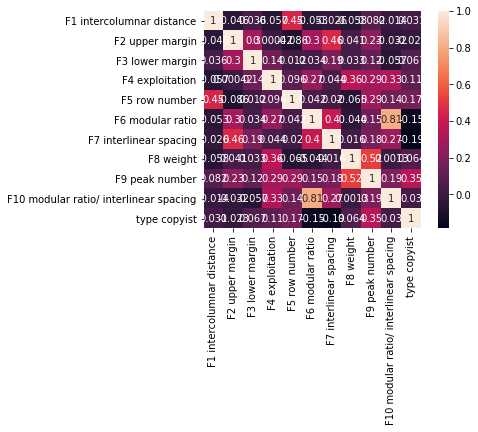

In [14]:
sns.heatmap(data.corr(), square=True, annot=True)

In [15]:
#Verificar la matriz de correlación 

def correlation(dataset, threshold):
    col_corr = set() # Set of all the names of deleted columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j] >= threshold) and (corr_matrix.columns[j] not in col_corr):
                print('Las columnas que presentan una alta correlación son:', corr_matrix.columns[i], corr_matrix.columns[j])
    return dataset

data = correlation(data,0.90)

11    400
7     400
3     400
10    400
6     400
2     400
9     400
5     400
1     400
8     400
4     400
0     400
Name: type copyist, dtype: int64


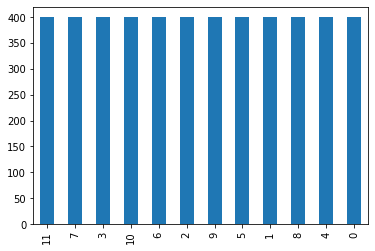

In [16]:
#Generar conjuntos de datos de igual cantidad con el fin de obtener una cantidad de registros iguales para 
#todos los tipos de clases,para ello se eliminarán algunos registros, mientras que otros pertenecientes a 
#otras clases se duplicarán.

#Primero se aumentaran la cantidad de registros pertenecientes a las clases que tienen menos de 1000 registros 
max_size = 400
lst = [data]

for class_index, group in data.groupby('type copyist'):
    if len(group) <= 206:
        lst.append(group.sample(max_size - len(group),replace=True))
    
dataBal = pd.concat(lst)

#Ahora las clases que tengan más de 1000 registros, eliminarán ciertos registros para que todos tengan 1000
g = dataBal.groupby('type copyist')
dataBal = pd.DataFrame(g.apply(lambda x: x.sample(g.size().min()).reset_index(drop=True)))

#Cuantos registros hay por cada clase? es decir, por cada valor del atributo de salida?
clasificar = dataBal['type copyist'].value_counts()
print(clasificar)
clasificar.plot(kind='bar');

In [17]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.svm import SVC
import statistics

In [95]:
#PRIMERA ITERACIÓN
HOLDOUT = 10

h_precisionP = []
h_recallP = []
h_f1scoreP = []
h_accuracyP = []
h_precisionM = []
h_recallM = []
h_f1scoreM = []
h_accuracyM = []

for i in range(HOLDOUT):
    print(i,'iteración')
    X_train, X_test, y_train, y_test = train_test_split(dataBal.drop(['type copyist'],axis=1), dataBal['type copyist'], test_size=0.4)
    # Se crea el clasificador base
    mlp = MLPClassifier(max_iter=5000)
    parameter_space = {
        'hidden_layer_sizes': [(5), (10), (50)],
        'activation': ['logistic', 'tanh', 'relu'],
    }
    #se selecciona el mejor numero de capas, nodos, y funcion de activación
    clf = GridSearchCV(mlp, parameter_space, n_jobs=-1, cv=3, refit=True)
    clf.fit(X_train,y_train)
    print('parámetro seleccionado: ',clf.best_params_)
    # Se hace la prediccion sobre los datos de prueba
    pred = clf.predict(X_test)
    # Se calculan metricas a partir de los datos de prueba
    mat = confusion_matrix(y_test, pred)
    #print('Esta es la matriz de perceptrón multicapa', mat)
    #print("Precision:",precision_score(y_test,pred))
    #print("Recall:",recall_score(y_test,pred))
    #print("F1score:",f1_score(y_test,pred))
    h_precisionP.append(precision_score(y_test,pred,average = 'micro'))
    h_recallP.append(recall_score(y_test,pred,average = 'micro'))
    h_f1scoreP.append(f1_score(y_test,pred,average = 'micro'))
    h_accuracyP.append(accuracy_score(y_test,pred))
 
    #modelo SVC
    modeloSVC = SVC()
    #Se entrena el modeloSVC
    modeloSVC.fit(X_train, y_train)
    #Se hace la predicción
    y_pred = modeloSVC.predict(X_test)
    
    mat2 = confusion_matrix(y_test, y_pred)
    #print('matriz de máquinas de vectores de soporte', mat2)
    # Se calculan metricas a partir de los datos de prueba
    matriz = confusion_matrix(y_test, y_pred)
    h_precisionM.append(precision_score(y_test,y_pred,average = 'micro'))
    h_recallM.append(recall_score(y_test,y_pred,average = 'micro'))
    h_f1scoreM.append(f1_score(y_test,y_pred,average = 'micro'))
    h_accuracyM.append(accuracy_score(y_test,y_pred))
    
print("Reporte del Holdout\n")

print("Medidas de Perceptrón multicapa")
print("Medias de precision, recall, f1score y accuracy:",statistics.mean(h_precisionP),statistics.mean(h_recallP),statistics.mean(h_f1scoreP),statistics.mean(h_accuracyP))
print("Desviaciones de precision, recall, f1score y accuracy:",statistics.stdev(h_precisionP),statistics.stdev(h_recallP),statistics.stdev(h_f1scoreP),statistics.stdev(h_accuracyP))
print("")
  
print("Medidas de vectores de soporte")
print("Medias de precision, recall, f1score y accuracy:",statistics.mean(h_precisionM),statistics.mean(h_recallM),statistics.mean(h_f1scoreM),statistics.mean(h_accuracyM))
print("Desviaciones de precision, recall,f1score y accuracy:",statistics.stdev(h_precisionM),statistics.stdev(h_recallM),statistics.stdev(h_f1scoreM),statistics.stdev(h_accuracyM))
print("")



0 iteración
parámetro seleccionado:  {'activation': 'logistic', 'hidden_layer_sizes': 50}
1 iteración
parámetro seleccionado:  {'activation': 'tanh', 'hidden_layer_sizes': 50}
2 iteración
parámetro seleccionado:  {'activation': 'tanh', 'hidden_layer_sizes': 50}
3 iteración
parámetro seleccionado:  {'activation': 'logistic', 'hidden_layer_sizes': 50}
4 iteración
parámetro seleccionado:  {'activation': 'logistic', 'hidden_layer_sizes': 50}
5 iteración
parámetro seleccionado:  {'activation': 'logistic', 'hidden_layer_sizes': 50}
6 iteración
parámetro seleccionado:  {'activation': 'logistic', 'hidden_layer_sizes': 50}
7 iteración
parámetro seleccionado:  {'activation': 'logistic', 'hidden_layer_sizes': 50}
8 iteración
parámetro seleccionado:  {'activation': 'logistic', 'hidden_layer_sizes': 50}
9 iteración
parámetro seleccionado:  {'activation': 'tanh', 'hidden_layer_sizes': 50}
Reporte del Holdout

Medidas de Perceptrón multicapa
Medias de precision, recall, f1score y accuracy: 0.86479166

11    8572
10    8572
9     8572
8     8572
7     8572
6     8572
5     8572
4     8572
3     8572
2     8572
1     8572
0     8572
Name: type copyist, dtype: int64


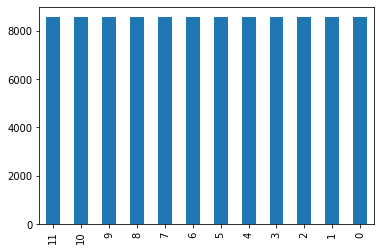

In [18]:
#Generar conjuntos de datos de igual cantidad con el fin de obtener una cantidad de registros iguales para 
#todos los tipos de clases,para ello se eliminarán algunos registros, mientras que otros pertenecientes a 
#otras clases se duplicarán.

#Primero se aumentaran la cantidad de registros pertenecientes a las clases que tienen menos de 1000 registros 
max_size = 8572
lst = [data]

for class_index, group in data.groupby('type copyist'):
    if len(group) <= 3923:
        lst.append(group.sample(max_size - len(group),replace=True))
    
dataBal = pd.concat(lst)

#Cuantos registros hay por cada clase? es decir, por cada valor del atributo de salida?
clasificar = dataBal['type copyist'].value_counts()
print(clasificar)
clasificar.plot(kind='bar');

In [19]:
#SEGUNDA ITERACIÓN

HOLDOUT = 10

h_precisionPI = []
h_recallPI = []
h_f1scorePI = []
h_accuracyPI = []


for i in range(HOLDOUT):
    print(i,'iteración')
    X_train, X_test, y_train, y_test = train_test_split(dataBal.drop(['type copyist'],axis=1), dataBal['type copyist'], test_size=0.4)
    # Se crea el clasificador base
    mlp = MLPClassifier(max_iter=5000)
    parameter_space = {
        'hidden_layer_sizes': [(5), (10), (50)],
        'activation': ['logistic', 'tanh', 'relu'],
    }
    #se selecciona el mejor numero de capas, nodos, y funcion de activación
    clf = GridSearchCV(mlp, parameter_space, n_jobs=-1, cv=5, refit=True)
    clf.fit(X_train,y_train)
    print('parámetro seleccionado: ',clf.best_params_)
    # Se hace la prediccion sobre los datos de prueba
    pred = clf.predict(X_test)
    # Se calculan metricas a partir de los datos de prueba
    mat = confusion_matrix(y_test, pred)
    #print('Esta es la matriz de perceptrón multicapa', mat)
    #print("Precision:",precision_score(y_test,pred))
    #print("Recall:",recall_score(y_test,pred))
    #print("F1score:",f1_score(y_test,pred))
    h_precisionPI.append(precision_score(y_test,pred,average = 'micro'))
    h_recallPI.append(recall_score(y_test,pred,average = 'micro'))
    h_f1scorePI.append(f1_score(y_test,pred,average = 'micro'))
    h_accuracyPI.append(accuracy_score(y_test,pred))
    
print("Reporte del Holdout\n")

print("Medidas de Perceptrón multicapa")
print("Medias de precision, recall, f1score y accuracy:",statistics.mean(h_precisionPI),statistics.mean(h_recallPI),statistics.mean(h_f1scorePI), statistics.mean(h_accuracyPI))
print("Desviaciones de precision, recall, f1score y accuracy:",statistics.stdev(h_precisionPI),statistics.stdev(h_recallPI),statistics.stdev(h_f1scorePI),statistics.stdev(h_accuracyPI))
print("")
  



0 iteración
parámetro seleccionado:  {'activation': 'tanh', 'hidden_layer_sizes': 50}
1 iteración
parámetro seleccionado:  {'activation': 'tanh', 'hidden_layer_sizes': 50}
2 iteración
parámetro seleccionado:  {'activation': 'tanh', 'hidden_layer_sizes': 50}
3 iteración
parámetro seleccionado:  {'activation': 'tanh', 'hidden_layer_sizes': 50}
4 iteración
parámetro seleccionado:  {'activation': 'tanh', 'hidden_layer_sizes': 50}
5 iteración
parámetro seleccionado:  {'activation': 'tanh', 'hidden_layer_sizes': 50}
6 iteración
parámetro seleccionado:  {'activation': 'tanh', 'hidden_layer_sizes': 50}
7 iteración
parámetro seleccionado:  {'activation': 'tanh', 'hidden_layer_sizes': 50}
8 iteración
parámetro seleccionado:  {'activation': 'tanh', 'hidden_layer_sizes': 50}
9 iteración
parámetro seleccionado:  {'activation': 'tanh', 'hidden_layer_sizes': 50}
Reporte del Holdout

Medidas de Perceptrón multicapa
Medias de precision, recall, f1score y accuracy: 0.9730763622223302 0.9730763622223302 

In [ ]:
#TERCERA ITERACIÓN

HOLDOUT = 10

h_precisionPI = []
h_recallPI = []
h_f1scorePI = []
h_accuracyPI = []


for i in range(HOLDOUT):
    print(i,'iteración')
    X_train, X_test, y_train, y_test = train_test_split(dataBal.drop(['type copyist'],axis=1), dataBal['type copyist'], test_size=0.4)
    # Se crea el clasificador base
    mlp = MLPClassifier(max_iter=5000)
    parameter_space = {
        'hidden_layer_sizes': [(100), (200), (300)],
        'activation': ['logistic', 'tanh', 'relu'],
    }
    #se selecciona el mejor numero de capas, nodos, y funcion de activación
    clf = GridSearchCV(mlp, parameter_space, n_jobs=-1, cv=5, refit=True)
    clf.fit(X_train,y_train)
    print('parámetro seleccionado: ',clf.best_params_)
    # Se hace la prediccion sobre los datos de prueba
    pred = clf.predict(X_test)
    # Se calculan metricas a partir de los datos de prueba
    mat = confusion_matrix(y_test, pred)
    #print('Esta es la matriz de perceptrón multicapa', mat)
    #print("Precision:",precision_score(y_test,pred))
    #print("Recall:",recall_score(y_test,pred))
    #print("F1score:",f1_score(y_test,pred))
    h_precisionPI.append(precision_score(y_test,pred,average = 'micro'))
    h_recallPI.append(recall_score(y_test,pred,average = 'micro'))
    h_f1scorePI.append(f1_score(y_test,pred,average = 'micro'))
    h_accuracyPI.append(accuracy_score(y_test,pred))
    
print("Reporte del Holdout\n")

print("Medidas de Perceptrón multicapa")
print("Medias de precision, recall, f1score y accuracy:",statistics.mean(h_precisionPI),statistics.mean(h_recallPI),statistics.mean(h_f1scorePI), statistics.mean(h_accuracyPI))
print("Desviaciones de precision, recall, f1score y accuracy:",statistics.stdev(h_precisionPI),statistics.stdev(h_recallPI),statistics.stdev(h_f1scorePI),statistics.stdev(h_accuracyPI))
print("")
  


0 iteración
parámetro seleccionado:  {'activation': 'tanh', 'hidden_layer_sizes': 300}
1 iteración
